In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('water_potability.csv')

In [3]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [6]:
df.shape

(3276, 10)

In [7]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [8]:
df['ph'].mean()

7.080794504276835

In [9]:
df['ph'].fillna(df['ph'].mean(),inplace=True)

In [10]:
df.isnull().sum()

ph                   0
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [11]:
df['Sulfate'].fillna(df['Sulfate'].mean(),inplace=True)

In [12]:
df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean(),inplace=True)

In [67]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

# EXPLORATORY DATA ANALYSIS

<Axes: >

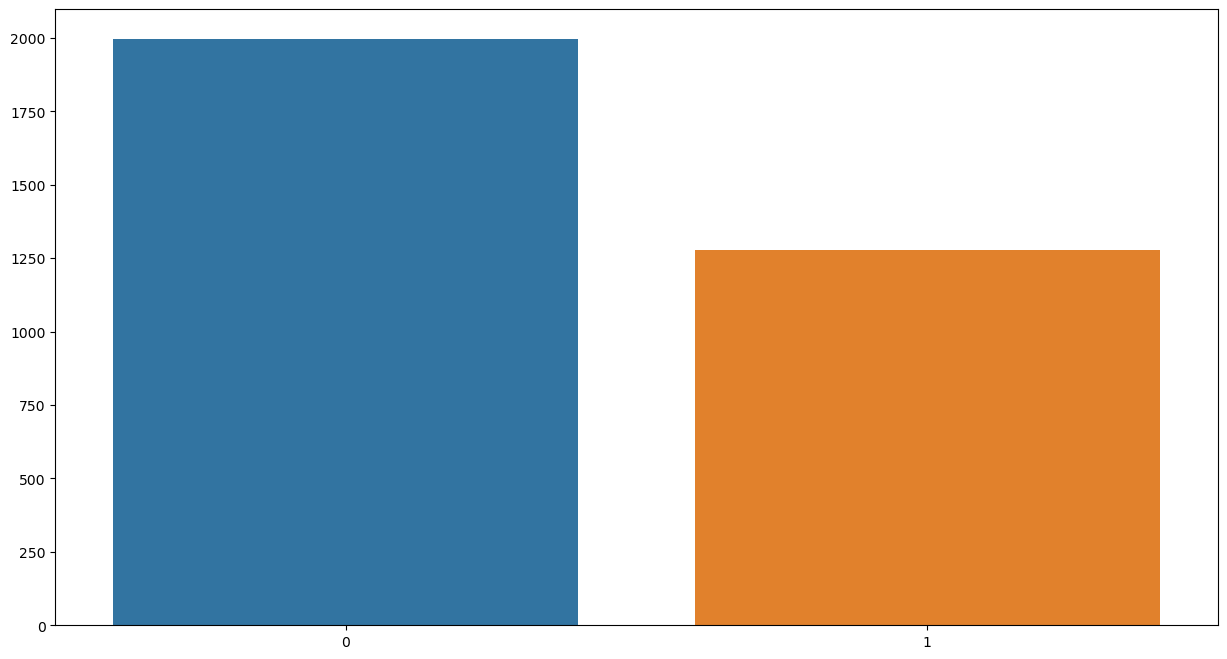

In [13]:
plt.figure(figsize=(15,8))
sns.barplot(x=df['Potability'].value_counts().index,y=df['Potability'].value_counts().values)

# ph and potability 

CORRELATION B/W Ph AND POTABILITY IS -0.0032868434924191556
SKEWNESS OF PH IS 0.027795881574044657


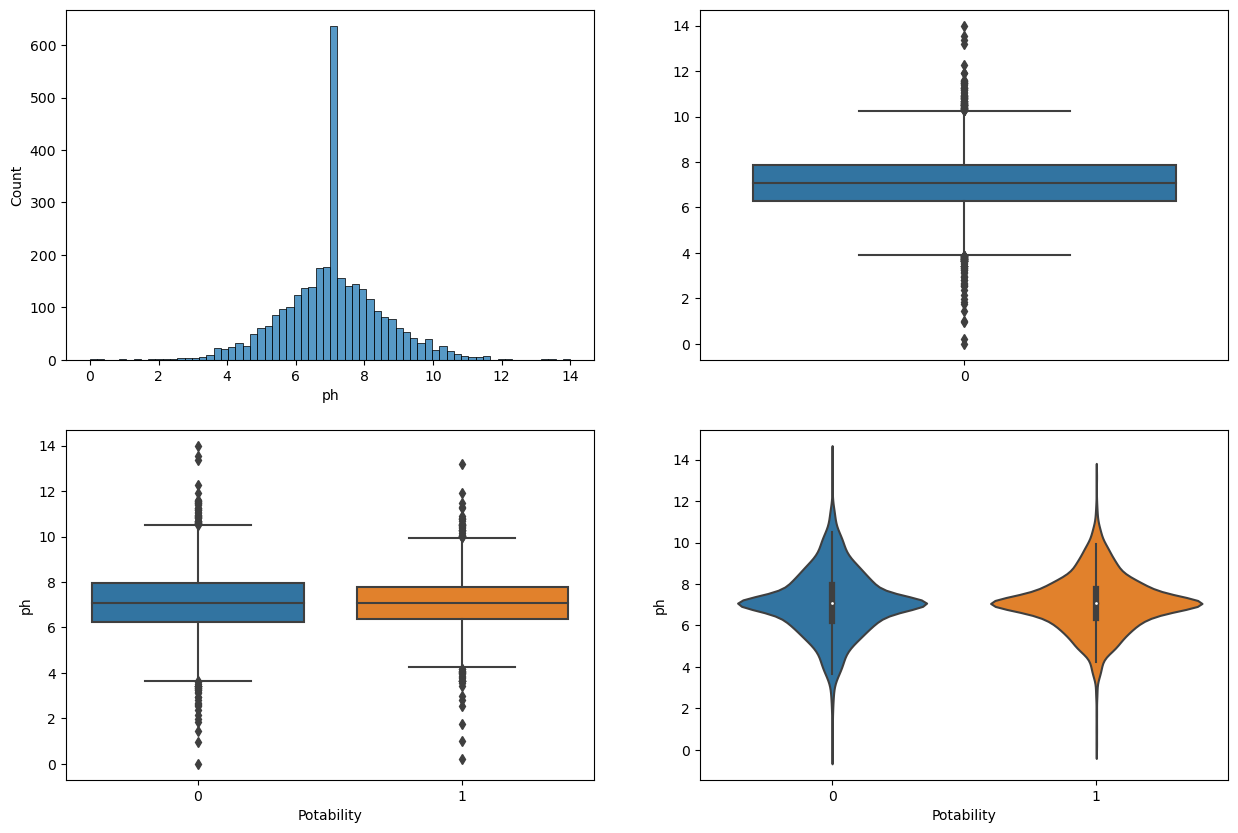

In [14]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(x=df['ph'])
plt.subplot(2,2,2)
sns.boxplot(df['ph'])
plt.subplot(2,2,3)
sns.boxplot(x=df['Potability'],y=df['ph'])
plt.subplot(2,2,4)
sns.violinplot(x=df['Potability'],y=df['ph'])
print('CORRELATION B/W Ph AND POTABILITY IS',df['Potability'].corr(df['ph']))
print('SKEWNESS OF PH IS',df['ph'].skew())

# Hardness and Potability

CORRELATION B/W HARDNESS AND POTABILITY IS -0.013836558085111495
SKEWNESS OF HARDNESS IS -0.0393417047767249


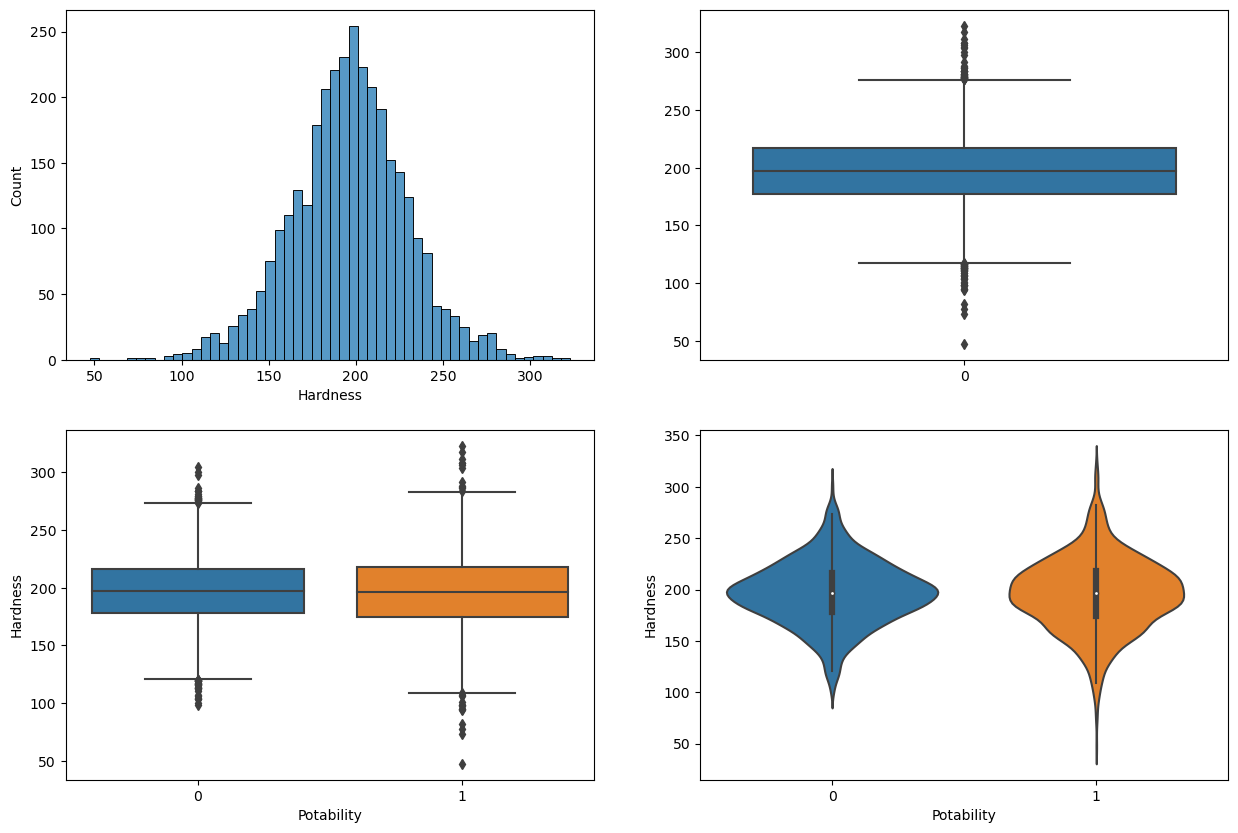

In [15]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(x=df['Hardness'])
plt.subplot(2,2,2)
sns.boxplot(df['Hardness'])
plt.subplot(2,2,3)
sns.boxplot(x=df['Potability'],y=df['Hardness'])
plt.subplot(2,2,4)
sns.violinplot(x=df['Potability'],y=df['Hardness'])
print('CORRELATION B/W HARDNESS AND POTABILITY IS',df['Potability'].corr(df['Hardness']))
print('SKEWNESS OF HARDNESS IS',df['Hardness'].skew())

# SOLIDS AND POTABILITY

CORRELATION B/W SOLIDS AND POTABILITY IS 0.03374331339365003
SKEWNESS OF SOLIDS IS 0.6216344855169127


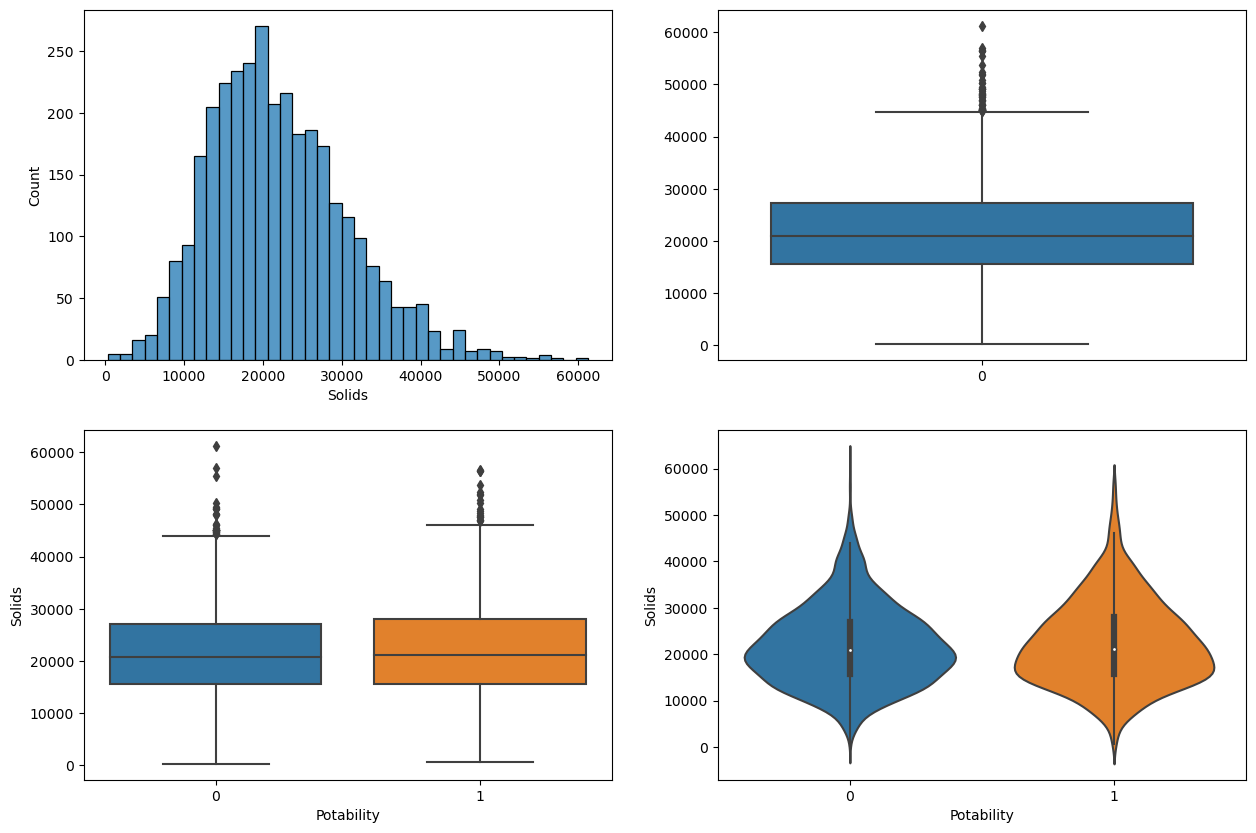

In [16]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(x=df['Solids'])
plt.subplot(2,2,2)
sns.boxplot(df['Solids'])
plt.subplot(2,2,3)
sns.boxplot(x=df['Potability'],y=df['Solids'])
plt.subplot(2,2,4)
sns.violinplot(x=df['Potability'],y=df['Solids'])
print('CORRELATION B/W SOLIDS AND POTABILITY IS',df['Potability'].corr(df['Solids']))
print('SKEWNESS OF SOLIDS IS',df['Solids'].skew())

# CHLORAMINES AND POTABILITY

CORRELATION B/W CHLORAMINES AND POTABILITY IS 0.02377897199466968
SKEWNESS OF CHLORAMINES IS -0.01209844012438221


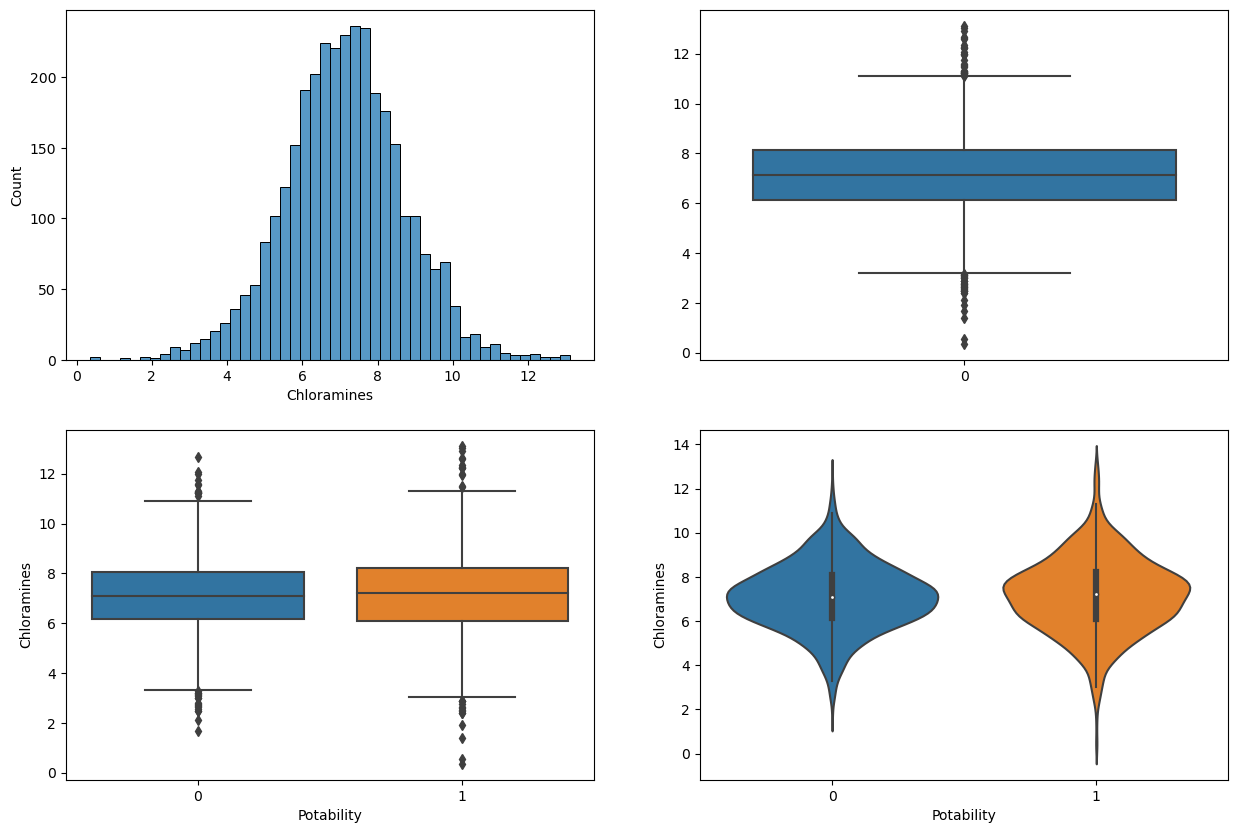

In [17]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(x=df['Chloramines'])
plt.subplot(2,2,2)
sns.boxplot(df['Chloramines'])
plt.subplot(2,2,3)
sns.boxplot(x=df['Potability'],y=df['Chloramines'])
plt.subplot(2,2,4)
sns.violinplot(x=df['Potability'],y=df['Chloramines'])
print('CORRELATION B/W CHLORAMINES AND POTABILITY IS',df['Potability'].corr(df['Chloramines']))
print('SKEWNESS OF CHLORAMINES IS',df['Chloramines'].skew())

# SULFATES AND POTABILITY

CORRELATION B/W SULFATE AND POTABILITY IS -0.020619084357933814
SKEWNESS OF SULFATE IS -0.04118437258768767


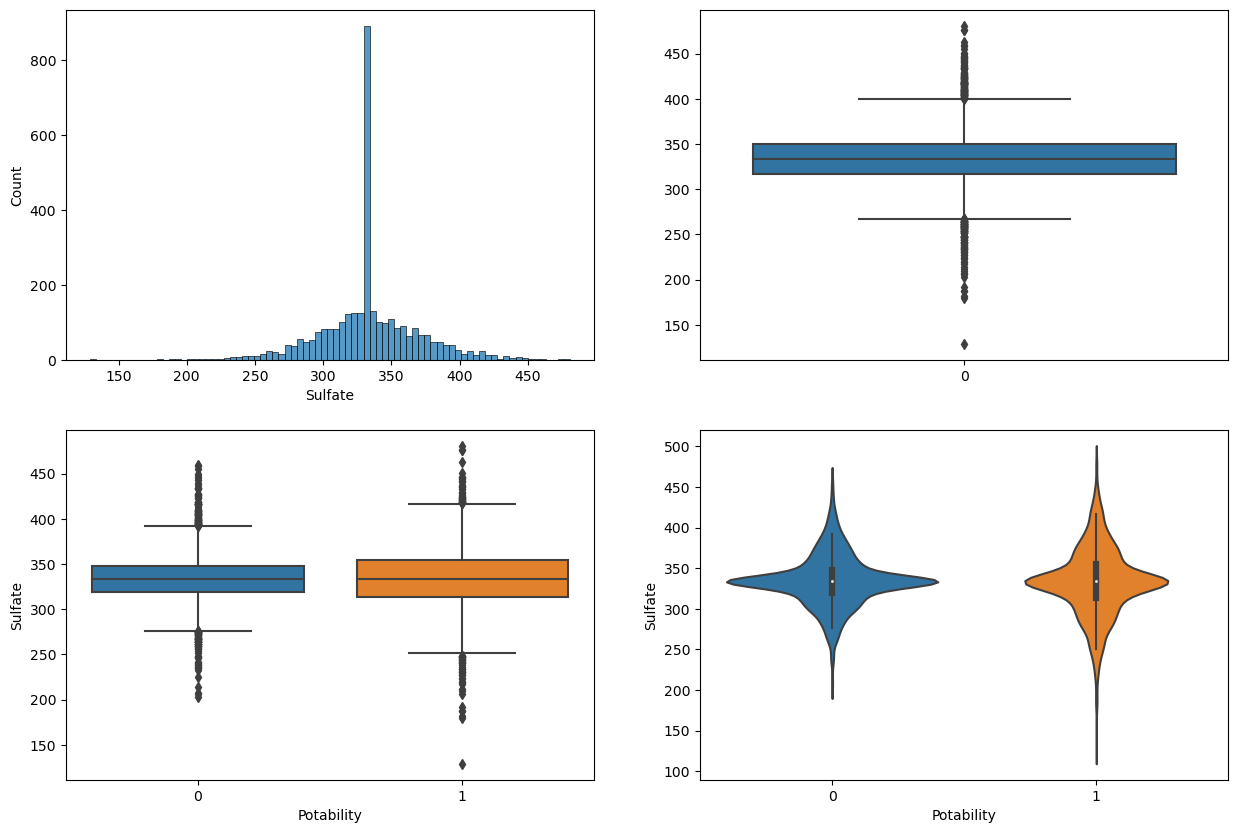

In [18]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(x=df['Sulfate'])
plt.subplot(2,2,2)
sns.boxplot(df['Sulfate'])
plt.subplot(2,2,3)
sns.boxplot(x=df['Potability'],y=df['Sulfate'])
plt.subplot(2,2,4)
sns.violinplot(x=df['Potability'],y=df['Sulfate'])
print('CORRELATION B/W SULFATE AND POTABILITY IS',df['Potability'].corr(df['Sulfate']))
print('SKEWNESS OF SULFATE IS',df['Sulfate'].skew())

# CONDUCTIVITY AND POTABILITY

CORRELATION B/W CONDUCTIVITY AND POTABILITY IS -0.008128319721545497
SKEWNESS OF CONDUCTIVITY IS 0.2644902239264119


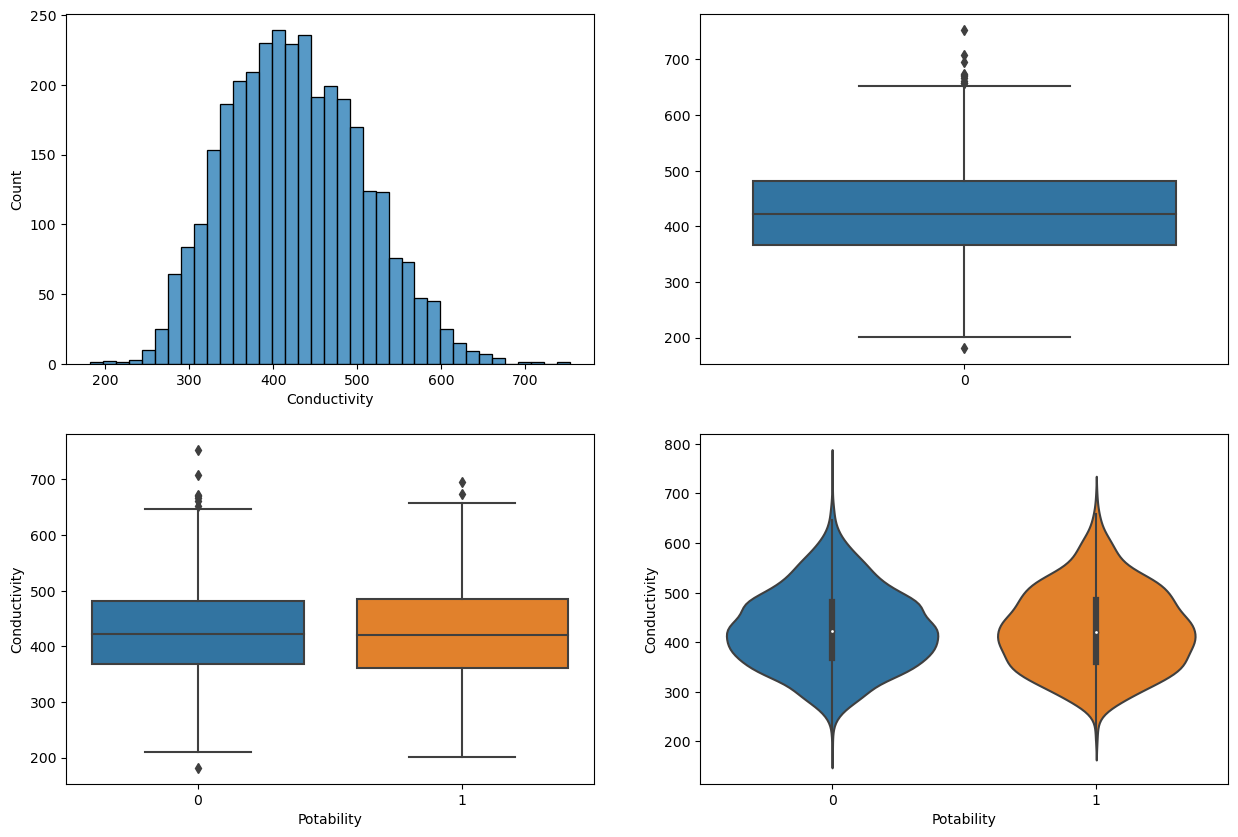

In [19]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(x=df['Conductivity'])
plt.subplot(2,2,2)
sns.boxplot(df['Conductivity'])
plt.subplot(2,2,3)
sns.boxplot(x=df['Potability'],y=df['Conductivity'])
plt.subplot(2,2,4)
sns.violinplot(x=df['Potability'],y=df['Conductivity'])
print('CORRELATION B/W CONDUCTIVITY AND POTABILITY IS',df['Potability'].corr(df['Conductivity']))
print('SKEWNESS OF CONDUCTIVITY IS',df['Conductivity'].skew())

# ORGANIC CARBONS AND POTABILITY

CORRELATION B/W ORGANIC CARBON AND POTABILITY IS -0.03000136661094469
SKEWNESS OF ORGANIC CARBON IS 0.025532582090242492


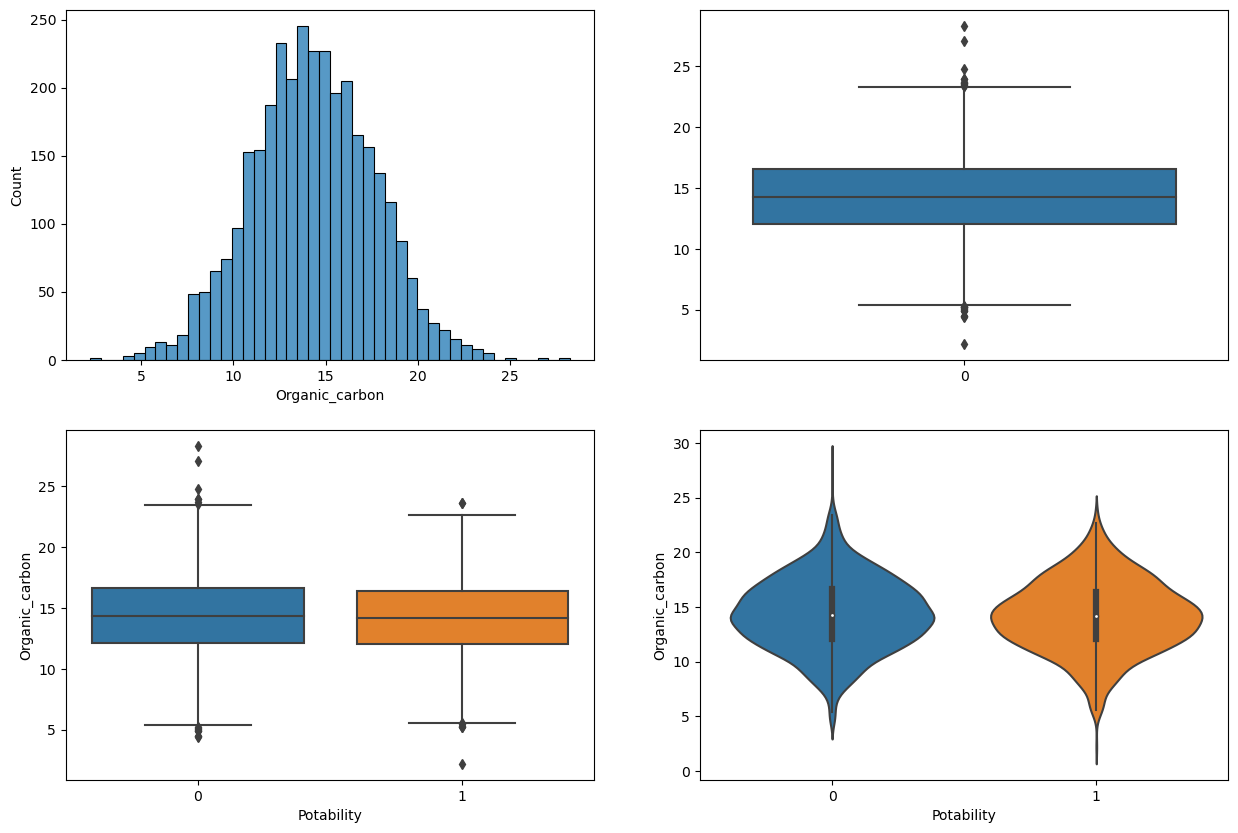

In [20]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(x=df['Organic_carbon'])
plt.subplot(2,2,2)
sns.boxplot(df['Organic_carbon'])
plt.subplot(2,2,3)
sns.boxplot(x=df['Potability'],y=df['Organic_carbon'])
plt.subplot(2,2,4)
sns.violinplot(x=df['Potability'],y=df['Organic_carbon'])
print('CORRELATION B/W ORGANIC CARBON AND POTABILITY IS',df['Potability'].corr(df['Organic_carbon']))
print('SKEWNESS OF ORGANIC CARBON IS',df['Organic_carbon'].skew())

# TRIHALOMETHANES AND POTABILITY

CORRELATION B/W TRIHALOMETHANES AND POTABILITY IS 0.006960211364796264
SKEWNESS OF TRIHALOMETHANES IS -0.08516101983758483


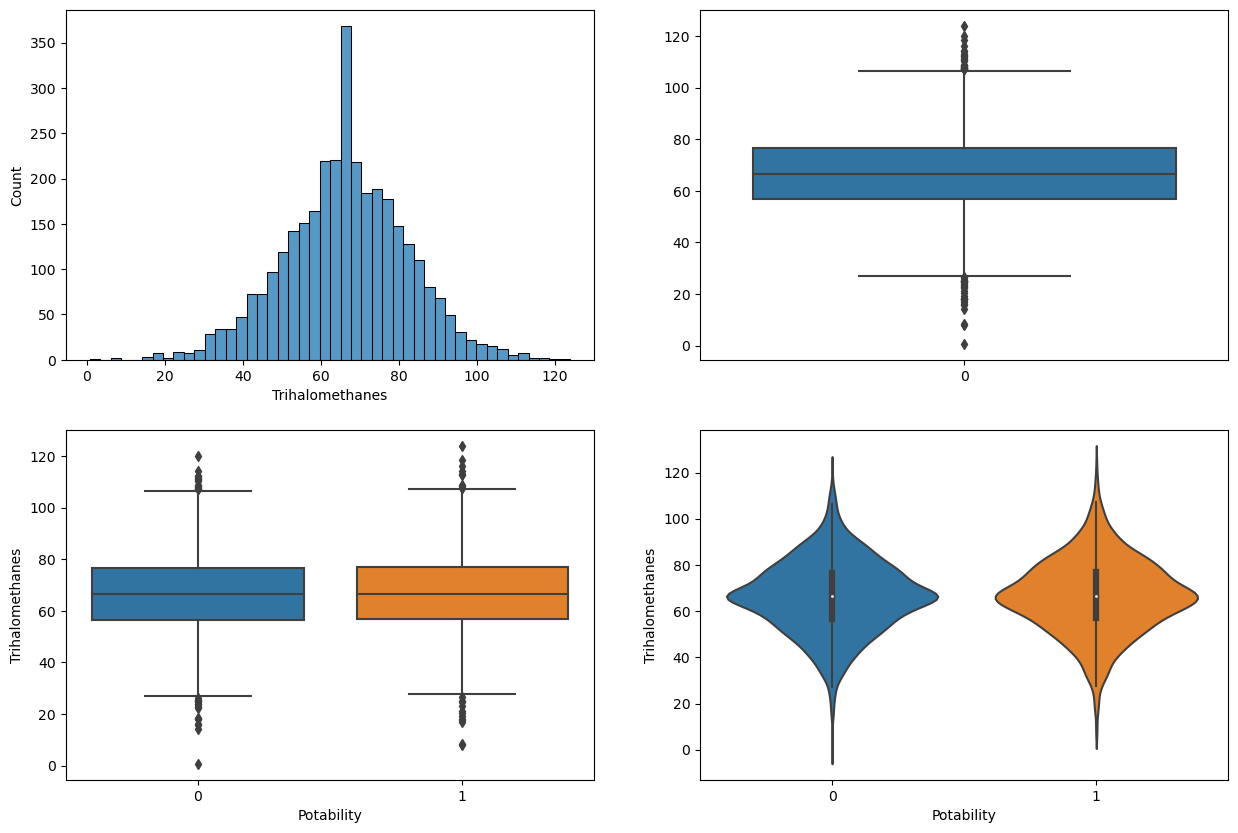

In [21]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(x=df['Trihalomethanes'])
plt.subplot(2,2,2)
sns.boxplot(df['Trihalomethanes'])
plt.subplot(2,2,3)
sns.boxplot(x=df['Potability'],y=df['Trihalomethanes'])
plt.subplot(2,2,4)
sns.violinplot(x=df['Potability'],y=df['Trihalomethanes'])
print('CORRELATION B/W TRIHALOMETHANES AND POTABILITY IS',df['Potability'].corr(df['Trihalomethanes']))
print('SKEWNESS OF TRIHALOMETHANES IS',df['Trihalomethanes'].skew())

# TURBIDITY AND POTABILITY

CORRELATION B/W TURBIDITY AND POTABILITY IS 0.0015806819539223268
SKEWNESS OF TURBIDITY IS -0.007816642377392604


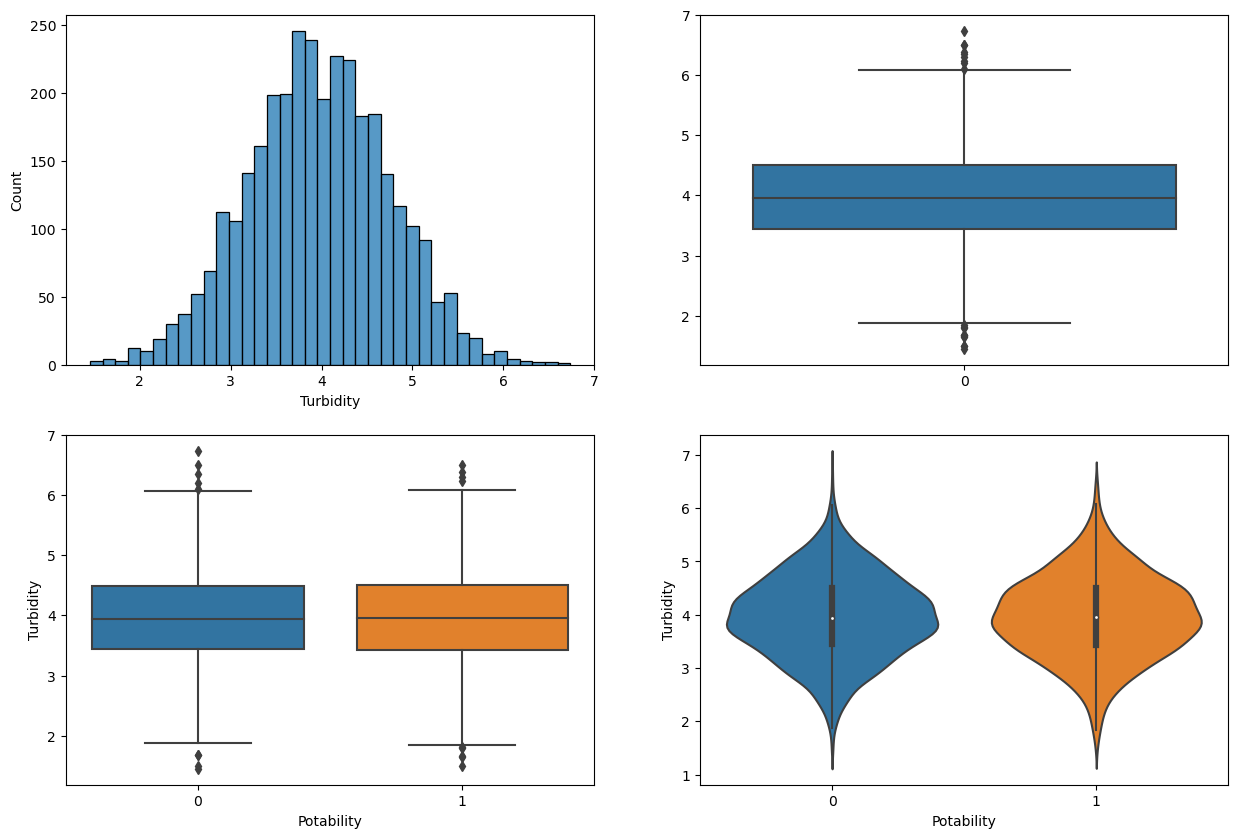

In [22]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(x=df['Turbidity'])
plt.subplot(2,2,2)
sns.boxplot(df['Turbidity'])
plt.subplot(2,2,3)
sns.boxplot(x=df['Potability'],y=df['Turbidity'])
plt.subplot(2,2,4)
sns.violinplot(x=df['Potability'],y=df['Turbidity'])
print('CORRELATION B/W TURBIDITY AND POTABILITY IS',df['Potability'].corr(df['Turbidity']))
print('SKEWNESS OF TURBIDITY IS',df['Turbidity'].skew())

# CORRELATION HEATMAP

<Axes: >

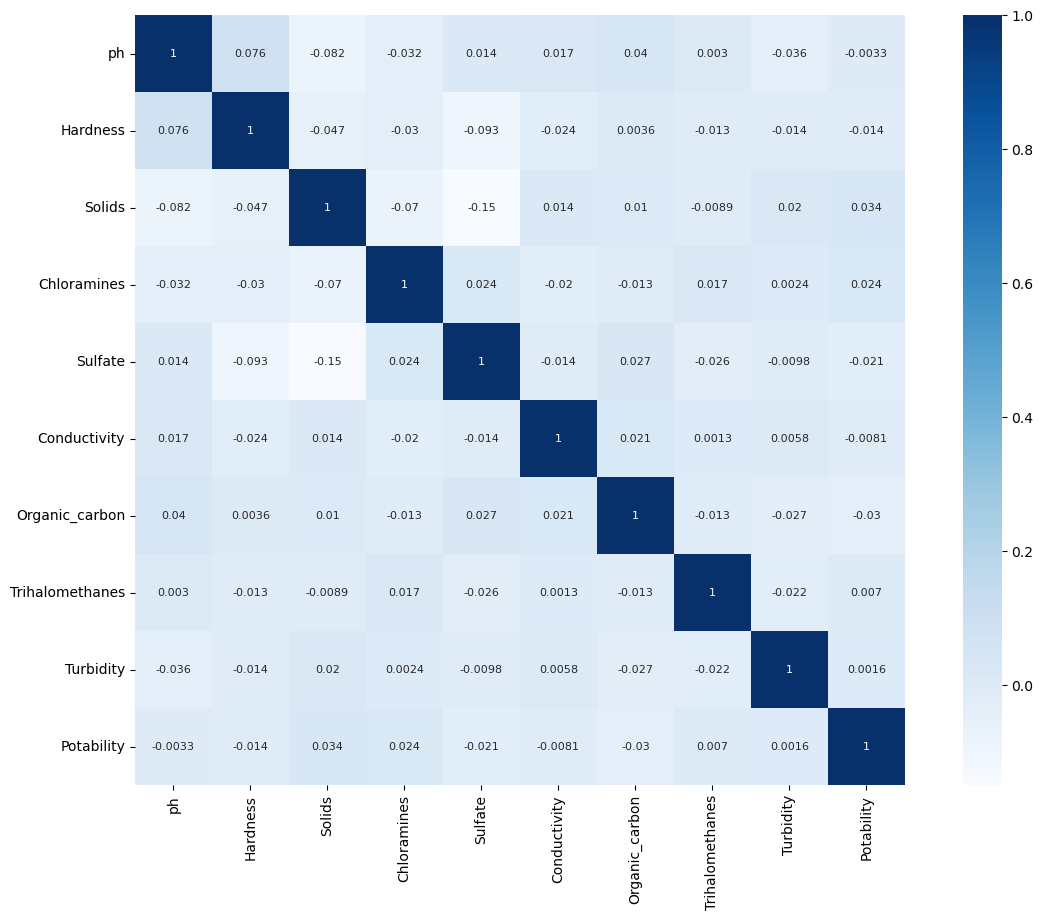

In [23]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cbar=True,square=True,annot=True,annot_kws={'size':8},cmap="Blues")

<Axes: xlabel='ph', ylabel='Turbidity'>

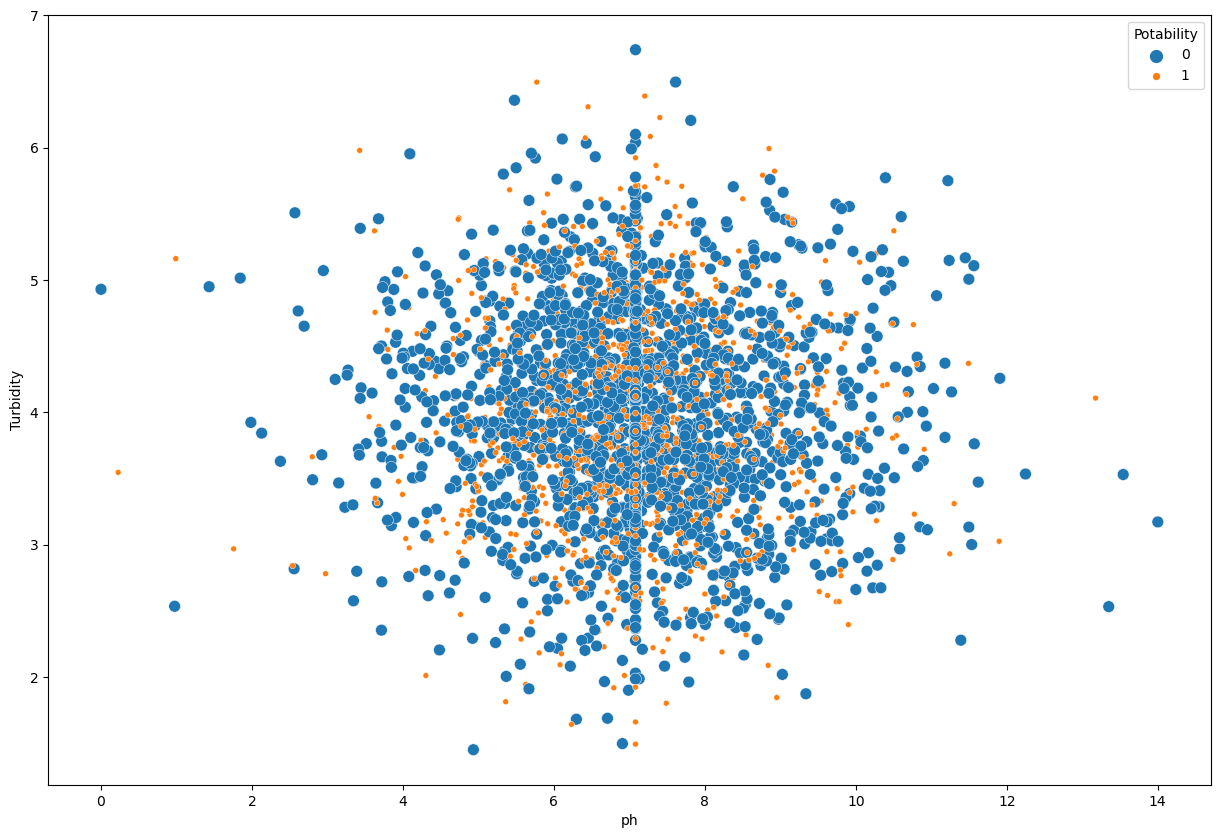

In [24]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=df['ph'],y=df['Turbidity'],hue=df['Potability'],size=(df['Potability']),legend=True)

# REMOVING OUTLIERS

In [25]:
from scipy import stats
z = np.abs(stats.zscore(df[df.dtypes[df.dtypes != 'object'].index]))
df = df[(z<3).all(axis=1)]

In [26]:
print(z)

                ph  Hardness    Solids  Chloramines       Sulfate  \
0     6.043133e-16  0.259195  0.139471     0.112415  9.613574e-01   
1     2.289339e+00  2.036414  0.385987     0.307694  3.145987e-15   
2     6.928678e-01  0.847665  0.240047     1.360594  3.145987e-15   
3     8.409504e-01  0.547651  0.000493     0.592008  6.395190e-01   
4     1.368569e+00  0.464429  0.460249     0.363698  6.541765e-01   
...            ...       ...       ...          ...           ...   
3271  1.641587e+00  0.081758  2.916188     0.028027  7.242640e-01   
3272  4.953704e-01  0.085667  0.534295     0.593290  3.145987e-15   
3273  1.591254e+00  0.626829  1.270810     0.144017  3.145987e-15   
3274  1.329516e+00  1.041355  1.144058     0.517373  3.145987e-15   
3275  5.401509e-01  0.038546  0.525812     0.244515  3.145987e-15   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0         1.708954        1.180651         1.306149   1.286298    0.799775  
1         2.06257

In [27]:
print(df)

            ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.080795  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  333.775777   
2     8.099124  224.236259  19909.541732     9.275884  333.775777   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  333.775777   
3273  9.419510  175.762646  33155.578218     7.350233  333.775777   
3274  5.126763  230.603758  11983.869376     6.303357  333.775777   
3275  7.874671  195.102299  17404.177061     7.509306  333.775777   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.88535

In [28]:
X = df.drop('Potability',axis=1)
Y = df['Potability']

<Axes: xlabel='Potability', ylabel='count'>

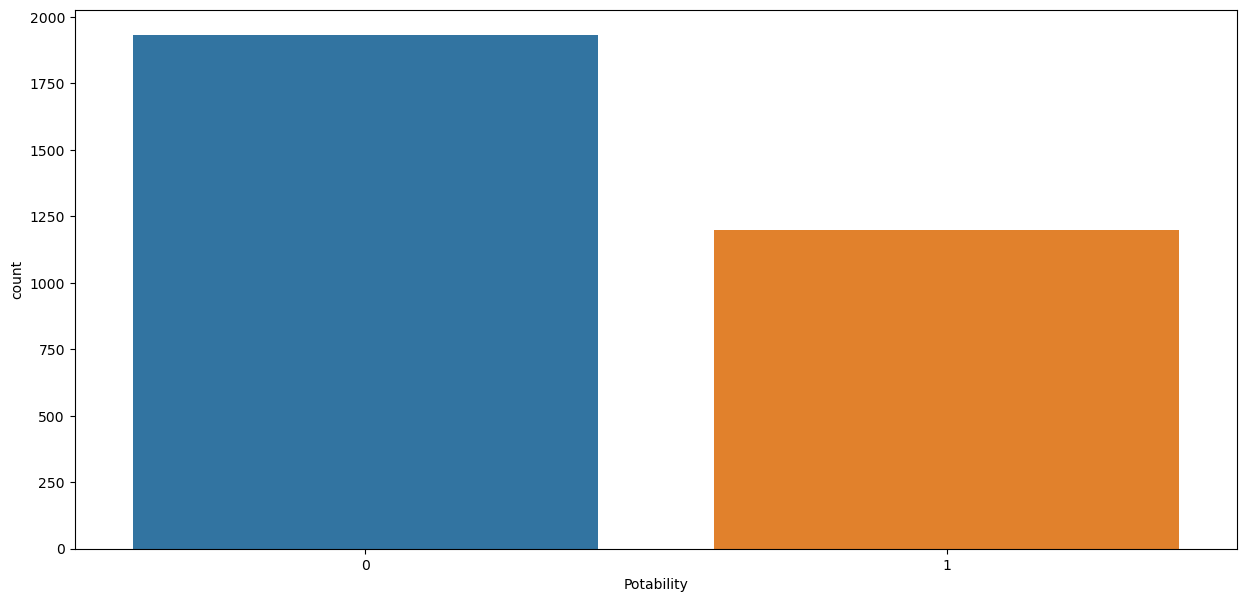

In [29]:
plt.figure(figsize=(15,7))
sns.countplot(x=Y)

In [30]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [32]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_train

array([[-0.0463716 , -1.07539654,  0.54334936, ..., -0.61619784,
        -0.97923569, -0.90822953],
       [ 0.97229546,  0.48206481,  0.69324486, ..., -0.59595383,
         0.04118262, -2.10019209],
       [ 0.06010495,  0.07241763,  0.61786937, ..., -0.54533555,
        -1.1332156 , -1.32991011],
       ...,
       [ 0.69717535,  0.86070974, -0.43380451, ..., -0.68041018,
         0.80074662, -0.82947632],
       [-0.84531731, -1.5078727 , -0.86759286, ...,  0.03354238,
        -0.65977038, -1.93309318],
       [ 0.00501698,  1.15973647, -0.04035971, ..., -0.64624098,
         0.02813592, -0.01896203]])

In [39]:
X_test = scaler.transform(X_test)
print(X_test)

[[-5.71172861 -6.31935625 -2.57905487 ... -4.87705641 -4.38913176
  -7.33614439]
 [-5.14889345 -6.28779122 -2.57879873 ... -4.06962413 -4.3613452
  -7.51575076]
 [-5.67486032 -6.25136762 -2.57918539 ... -4.57657907 -4.47189948
  -4.53372366]
 ...
 [-5.30204649 -6.2938332  -2.57909523 ... -4.25888662 -4.26099965
  -5.09465159]
 [-5.11378077 -6.2623283  -2.57910742 ... -4.46835845 -4.39121609
  -5.12384721]
 [-4.31813432 -6.2573352  -2.57888829 ... -4.43100158 -4.39377257
  -6.32195228]]


# HANDLING THE IMBALANCED DATA

In [40]:
from imblearn.over_sampling import SMOTE # synthetic minority oversampling technique
smote = SMOTE()
X,Y=smote.fit_resample(X,Y)

<Axes: xlabel='Potability', ylabel='count'>

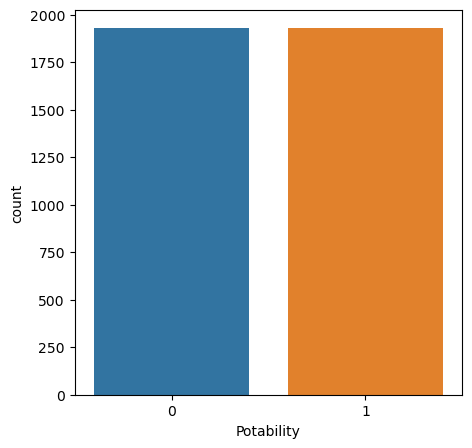

In [41]:
plt.figure(figsize=(5,5))
sns.countplot(x=Y)

# LOGISTIC REGRESSION

In [49]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(solver='newton-cg')

In [50]:
lr_model.fit(X_train,Y_train)

LogisticRegression(solver='newton-cg')

In [51]:
lr_model.score(X_test,Y_test)*100

61.980830670926515

In [52]:
y_lr_pred = lr_model.predict(X_test)

In [53]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_lr_pred))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77       388
           1       0.00      0.00      0.00       238

    accuracy                           0.62       626
   macro avg       0.31      0.50      0.38       626
weighted avg       0.38      0.62      0.47       626



In [54]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,y_lr_pred))

[[388   0]
 [238   0]]


# DECISION TREE

In [55]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=42,max_depth=3,min_samples_leaf=1,min_samples_split=2)

In [57]:
dtree.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [58]:
y_pred = dtree.predict(X_test)

In [59]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77       388
           1       0.00      0.00      0.00       238

    accuracy                           0.62       626
   macro avg       0.31      0.50      0.38       626
weighted avg       0.38      0.62      0.47       626



In [60]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,y_pred))

[[388   0]
 [238   0]]


# RANDOM FOREST CLASSIFIER

In [61]:
rfc = RandomForestClassifier()

In [62]:
rfc.fit(X_train,Y_train)

RandomForestClassifier()

In [63]:
y_rfc_pred = rfc.predict(X_test)

In [64]:
print(classification_report(Y_test,y_rfc_pred))

              precision    recall  f1-score   support

           0       0.63      0.04      0.08       388
           1       0.38      0.96      0.54       238

    accuracy                           0.39       626
   macro avg       0.51      0.50      0.31       626
weighted avg       0.53      0.39      0.26       626



In [65]:
print(confusion_matrix(Y_test,y_rfc_pred))

[[ 17 371]
 [ 10 228]]


# ADA BOOST

In [73]:
from sklearn.ensemble import AdaBoostClassifier
abc =AdaBoostClassifier()

In [74]:
abc.fit(X_train,Y_train)

AdaBoostClassifier()

In [75]:
y_abc_pred = abc.predict(X_test)

In [76]:
print(classification_report(Y_test,y_abc_pred))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77       388
           1       0.00      0.00      0.00       238

    accuracy                           0.62       626
   macro avg       0.31      0.50      0.38       626
weighted avg       0.38      0.62      0.47       626



In [91]:
print(abc.score(X_test,Y_test))

0.6198083067092651


In [78]:
print(confusion_matrix(Y_test,y_abc_pred))

[[388   0]
 [238   0]]


# XGB BOOST 

In [87]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
  Using cached xgboost-2.0.0-py3-none-win_amd64.whl (99.7 MB)


In [88]:
from xgboost import XGBClassifier

In [89]:
bts = XGBClassifier()
bts.fit(X_train,Y_train)
y_bts_pred = abc.predict(X_test)

In [90]:
print(bts.score(X_test,Y_test))

0.6230031948881789


Text(0.5, 1.0, 'CONFUSION MATRIX FOR ADA BOOST CLASSIFIER')

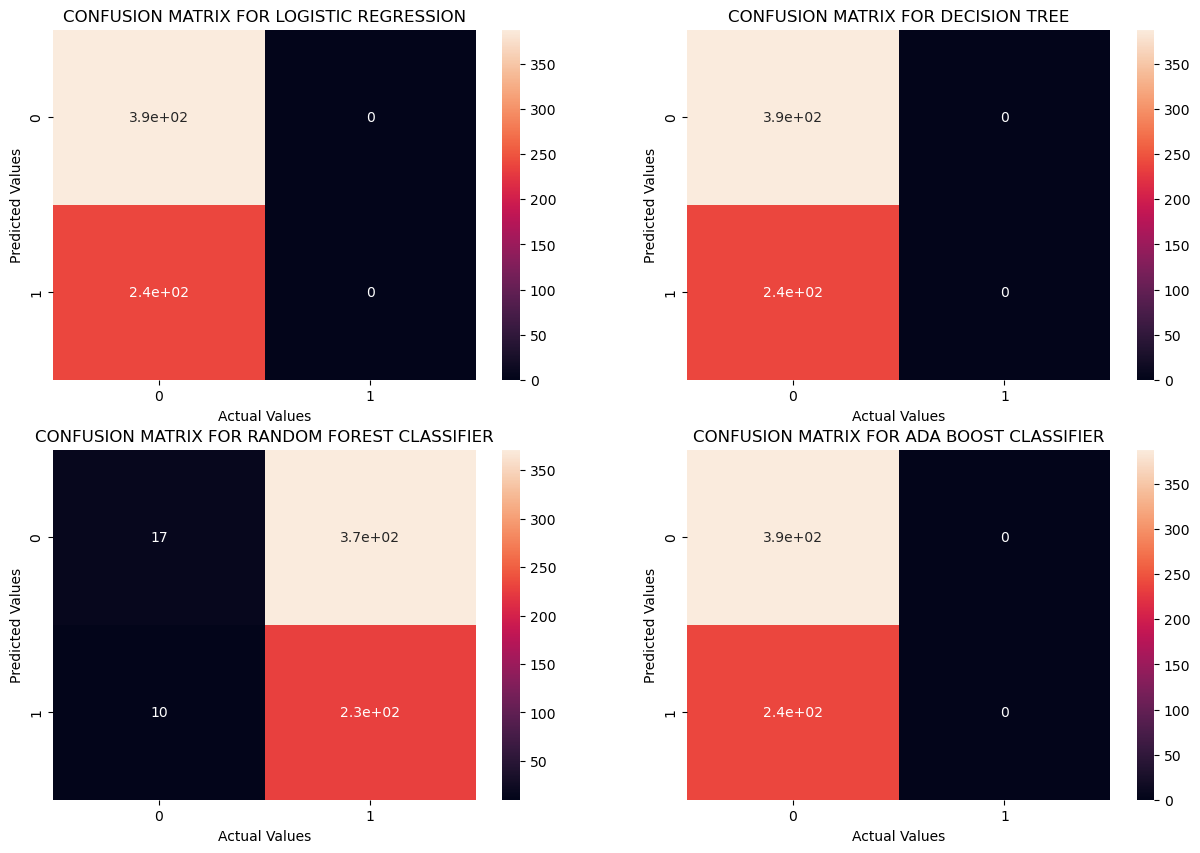

In [102]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.heatmap(confusion_matrix(Y_test,y_lr_pred),annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('CONFUSION MATRIX FOR LOGISTIC REGRESSION')

plt.subplot(2,2,2)
sns.heatmap(confusion_matrix(Y_test,y_pred),annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('CONFUSION MATRIX FOR DECISION TREE')

plt.subplot(2,2,3)
sns.heatmap(confusion_matrix(Y_test,y_rfc_pred),annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('CONFUSION MATRIX FOR RANDOM FOREST CLASSIFIER')

plt.subplot(2,2,4)
sns.heatmap(confusion_matrix(Y_test,y_abc_pred),annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('CONFUSION MATRIX FOR ADA BOOST CLASSIFIER')

Text(0.5, 1.0, 'CONFUSION MATRIX FOR ADA BOOST CLASSIFIER')

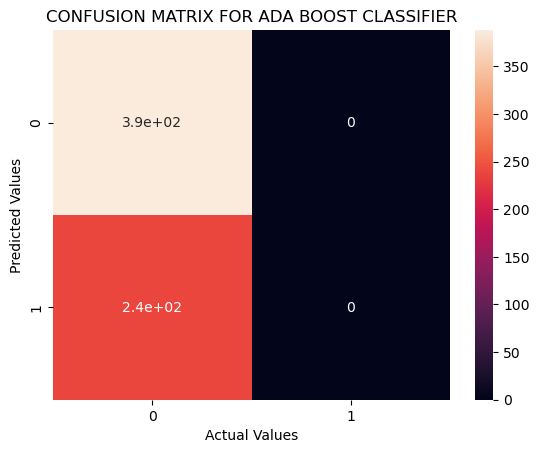

In [103]:
sns.heatmap(confusion_matrix(Y_test,y_bts_pred),annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('CONFUSION MATRIX FOR ADA BOOST CLASSIFIER')

Text(0, 0.5, 'ACCURACY')

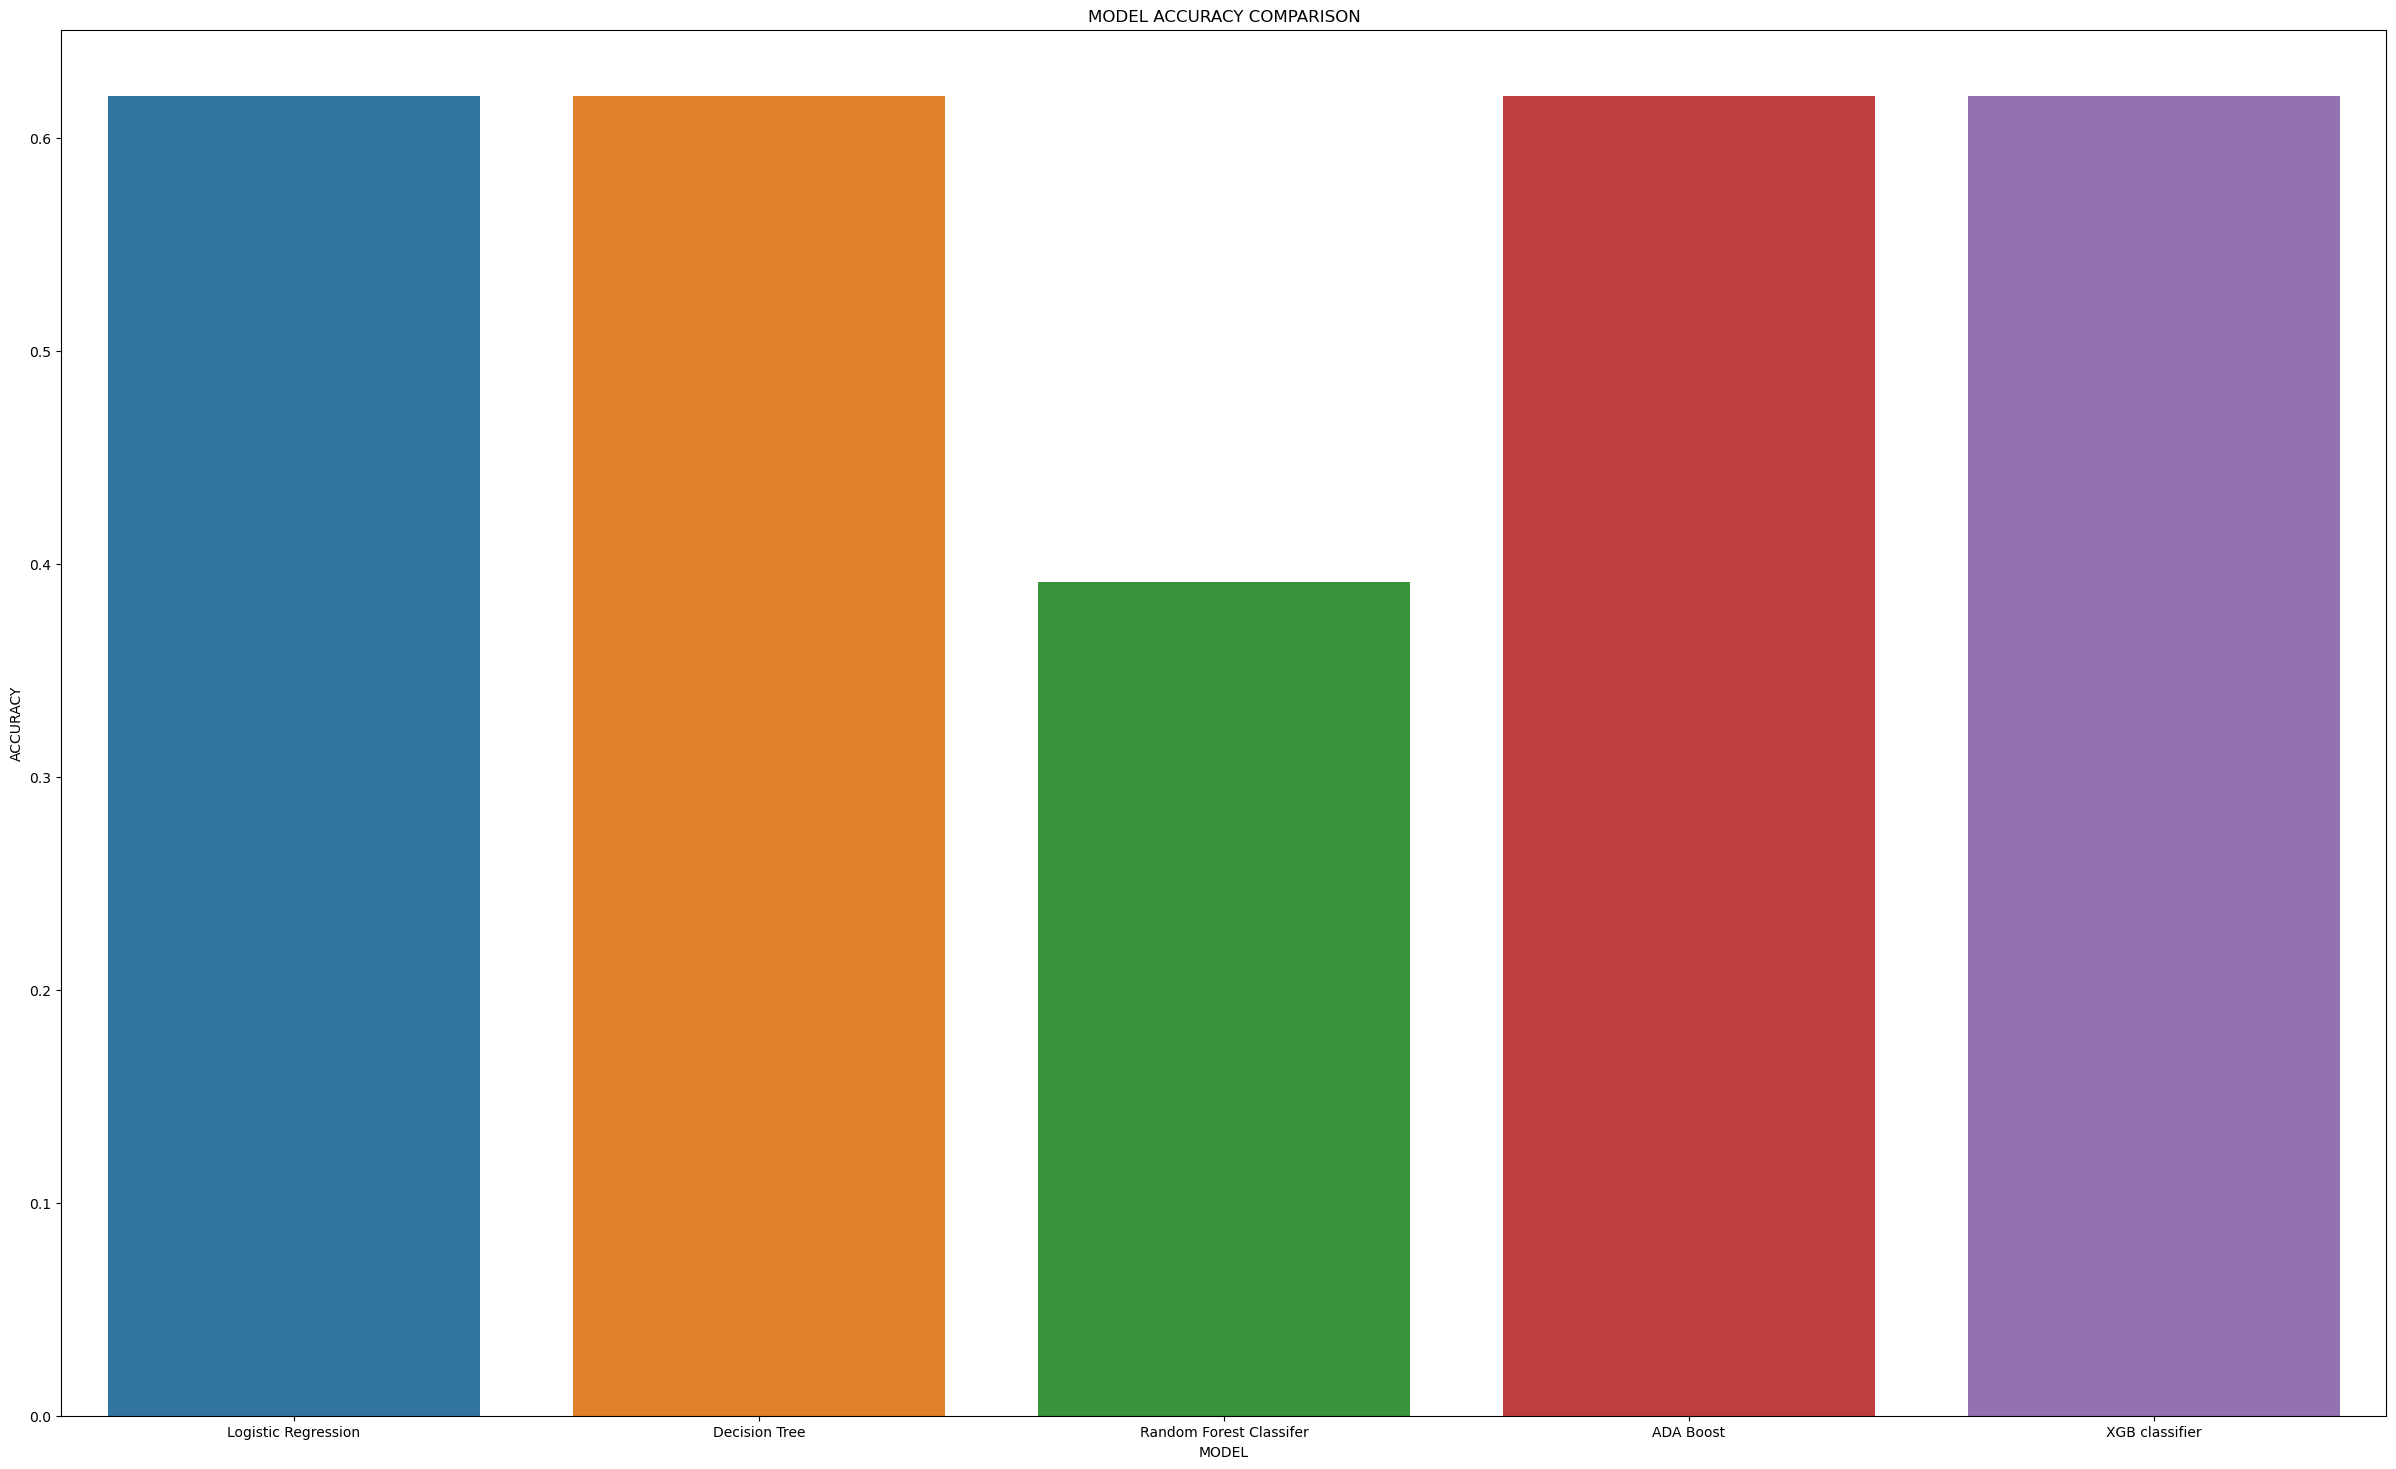

In [104]:
models = ['Logistic Regression','Decision Tree','Random Forest Classifer','ADA Boost','XGB classifier']
accuracy = [accuracy_score(Y_test,y_lr_pred),accuracy_score(Y_test,y_pred),accuracy_score(Y_test,y_rfc_pred),accuracy_score(Y_test,y_abc_pred),accuracy_score(Y_test,y_bts_pred)]
plt.figure(figsize=(30,18))
sns.barplot(x=models,y=accuracy)
plt.title('MODEL ACCURACY COMPARISON')
plt.xlabel('MODEL')
plt.ylabel('ACCURACY')

# PREDICTIVE SYSTEM

In [125]:
input_data = (4.999413,190.2871,2423.87,7.230164,324.893,405.3305,8.236558,99.42738,4.460684)
# data_numeric = np.array(input_data).astype(float)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = rfc.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
    print('WATER IS DRINKABLE')
else:
    print("WATER IS NOT DRINKABLE")

[0]
WATER IS DRINKABLE


In [116]:
import pickle

In [117]:
filename = 'water_model.sav'
pickle.dump(lr_model,open(filename,'wb'))

In [114]:
loaded_model = pickle.load(open('water_model.sav','rb'))